# Fraud Transaction Detection

## **Introduction**
With the rise of digital payment systems, fraud detection has become an essential component of financial security. The ability to accurately detect and prevent fraudulent transactions helps safeguard users, reduce financial losses, and maintain trust in financial institutions. This project, **Fraud Transaction Detection**, aims to build a machine learning-based system that classifies whether a transaction is **fraudulent or legitimate** based on key transaction attributes.

The dataset used in this project is a simulated transactional dataset that includes details such as transaction time, customer ID, terminal ID, transaction amount, and a binary fraud label. The fraud instances in the dataset are generated using three distinct and realistic scenarios, each reflecting common types of financial fraud:

1. **High-Value Transaction Fraud:** Any transaction with an amount greater than 220 is labeled as fraudulent. This scenario introduces an obvious fraud pattern and serves as a baseline for detecting clear anomalies.

2. **Compromised Terminal Fraud:** Every day, a random selection of two terminals is marked as compromised. All transactions conducted through these terminals for the next 28 days are considered fraudulent. This simulates terminal-level phishing or skimming attacks.

3. **Compromised Customer Fraud:** Each day, three customers are randomly selected. For the next 14 days, one-third of their transactions are modified—by increasing the transaction amount by a factor of five—and marked as fraudulent. This scenario reflects card-not-present fraud where attackers exploit leaked customer credentials to carry out high-value transactions.

By integrating features aligned with these fraud patterns and leveraging machine learning techniques, the system aims to detect complex fraudulent behavior with high accuracy. This project not only demonstrates how data science can be applied to real-world cybersecurity challenges but also showcases the importance of behavioral analysis in fraud detection.

## Importing Libraries

In [56]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
# Defining the folder path
pkl_folder ='C://Projects-20240722T093004Z-001//Projects//fraud_detection//fraud_detection//dataset//data//'

# Listing all .pkl files in the folder
pkl_files = [f for f in os.listdir(pkl_folder) if f.endswith('.pkl')]
print("Pickle files found:", pkl_files)

# Loading one PKL file into a DataFrame
pkl_file_path = os.path.join(pkl_folder, pkl_files[0])  # Load first file

# Loading the file
df = pd.read_pickle(pkl_file_path)

Pickle files found: ['2018-04-01.pkl', '2018-04-02.pkl', '2018-04-03.pkl', '2018-04-04.pkl', '2018-04-05.pkl', '2018-04-06.pkl', '2018-04-07.pkl', '2018-04-08.pkl', '2018-04-09.pkl', '2018-04-10.pkl', '2018-04-11.pkl', '2018-04-12.pkl', '2018-04-13.pkl', '2018-04-14.pkl', '2018-04-15.pkl', '2018-04-16.pkl', '2018-04-17.pkl', '2018-04-18.pkl', '2018-04-19.pkl', '2018-04-20.pkl', '2018-04-21.pkl', '2018-04-22.pkl', '2018-04-23.pkl', '2018-04-24.pkl', '2018-04-25.pkl', '2018-04-26.pkl', '2018-04-27.pkl', '2018-04-28.pkl', '2018-04-29.pkl', '2018-04-30.pkl', '2018-05-01.pkl', '2018-05-02.pkl', '2018-05-03.pkl', '2018-05-04.pkl', '2018-05-05.pkl', '2018-05-06.pkl', '2018-05-07.pkl', '2018-05-08.pkl', '2018-05-09.pkl', '2018-05-10.pkl', '2018-05-11.pkl', '2018-05-12.pkl', '2018-05-13.pkl', '2018-05-14.pkl', '2018-05-15.pkl', '2018-05-16.pkl', '2018-05-17.pkl', '2018-05-18.pkl', '2018-05-19.pkl', '2018-05-20.pkl', '2018-05-21.pkl', '2018-05-22.pkl', '2018-05-23.pkl', '2018-05-24.pkl', '2018-0

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9488 entries, 0 to 9487
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   TRANSACTION_ID     9488 non-null   int64         
 1   TX_DATETIME        9488 non-null   datetime64[ns]
 2   CUSTOMER_ID        9488 non-null   object        
 3   TERMINAL_ID        9488 non-null   object        
 4   TX_AMOUNT          9488 non-null   float64       
 5   TX_TIME_SECONDS    9488 non-null   object        
 6   TX_TIME_DAYS       9488 non-null   object        
 7   TX_FRAUD           9488 non-null   int64         
 8   TX_FRAUD_SCENARIO  9488 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 741.2+ KB


In [44]:
df.describe()

,TRANSACTION_ID,TX_DATETIME,TX_AMOUNT,TX_FRAUD,TX_FRAUD_SCENARIO
count,9488.000000,9488,9488.000000,9488.000000,9488.000000
mean,4743.500000,2018-04-01 12:01:31.743676416,53.249981,0.000316,0.000316
min,0.000000,2018-04-01 00:00:31,0.130000,0.000000,0.000000
25%,2371.750000,2018-04-01 08:25:20,21.197500,0.000000,0.000000
50%,4743.500000,2018-04-01 12:00:24,45.590000,0.000000,0.000000
75%,7115.250000,2018-04-01 15:37:57.249999872,76.932500,0.000000,0.000000
max,9487.000000,2018-04-01 23:59:51,226.400000,1.000000,1.000000
std,2739.094011,NaN,39.504071,0.017780,0.017780


In [46]:
df.columns

Index(['TRANSACTION_ID', 'TX_DATETIME', 'CUSTOMER_ID', 'TERMINAL_ID',
       'TX_AMOUNT', 'TX_TIME_SECONDS', 'TX_TIME_DAYS', 'TX_FRAUD',
       'TX_FRAUD_SCENARIO'],
      dtype='object')

In [103]:
# Check for missing values
df.isnull().sum()


TRANSACTION_ID       0
TX_DATETIME          0
CUSTOMER_ID          0
TERMINAL_ID          0
TX_AMOUNT            0
TX_TIME_SECONDS      0
TX_TIME_DAYS         0
TX_FRAUD             0
TX_FRAUD_SCENARIO    0
dtype: int64

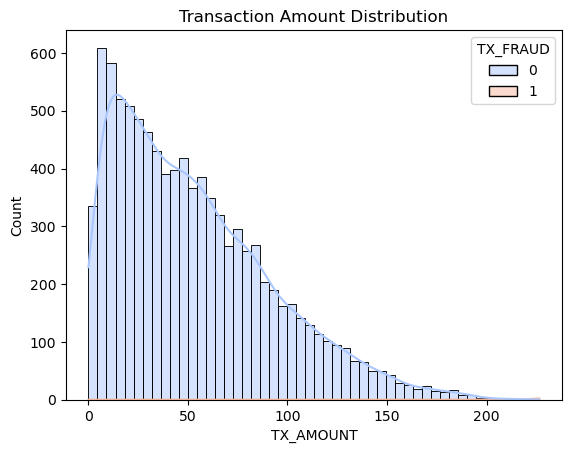

In [109]:
sns.histplot(data=df, x='TX_AMOUNT', hue='TX_FRAUD', bins=50, kde=True, palette='coolwarm')
plt.title("Transaction Amount Distribution")
plt.show()


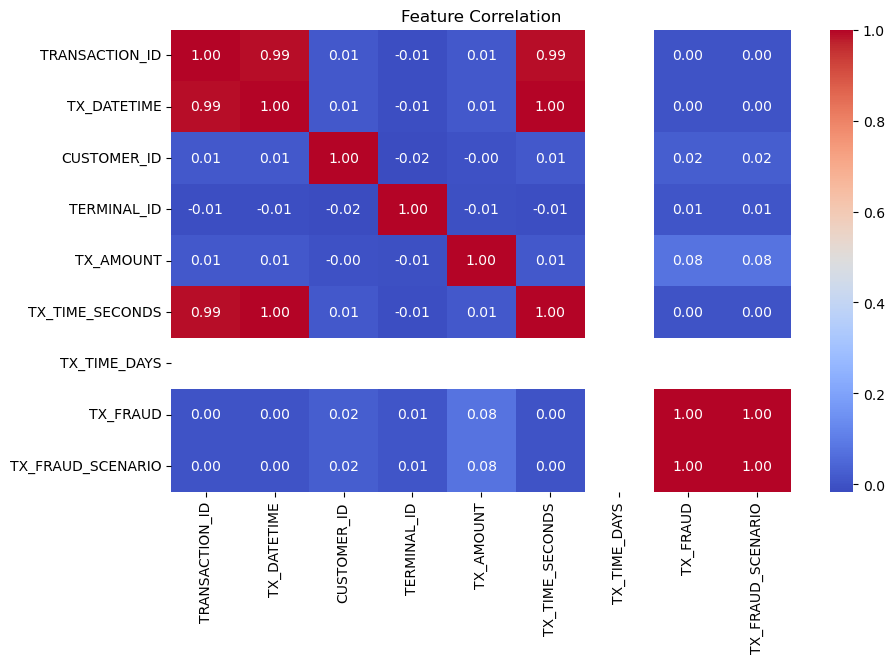

In [105]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()


# Distribution of target

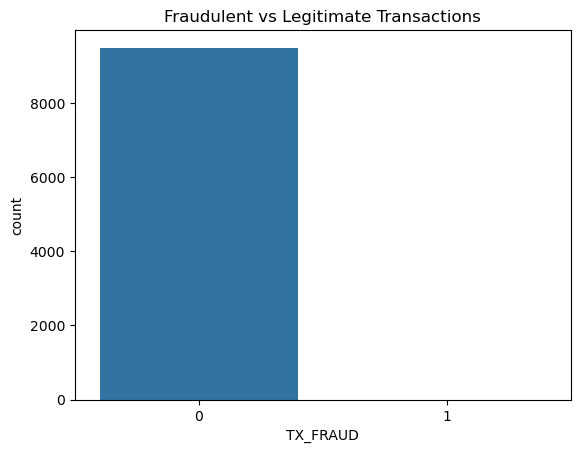

In [61]:
sns.countplot(x='TX_FRAUD', data=df)
plt.title("Fraudulent vs Legitimate Transactions")
plt.show()


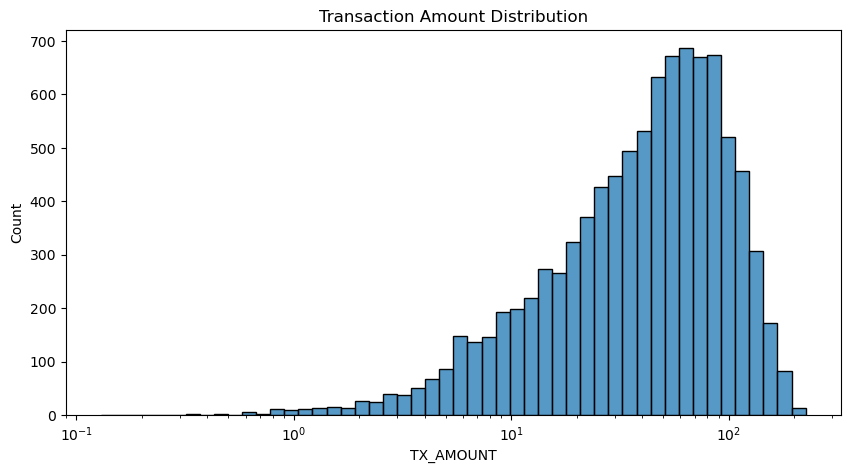

In [63]:
# Transaction amount
plt.figure(figsize=(10,5))
sns.histplot(df['TX_AMOUNT'], bins=50, log_scale=True)
plt.title("Transaction Amount Distribution")
plt.show()

In [8]:
# Convert datetime
df['TX_DATETIME'] = pd.to_datetime(df['TX_DATETIME'])

## Feature Engineering

In [10]:
# Day of transaction
df['TX_DATE'] = df['TX_DATETIME'].dt.date
df['TX_DAY'] = df['TX_DATETIME'].dt.dayofyear

# Scenario 1: Amount > 220 is considered fraud
df['SCENARIO1_FLAG'] = (df['TX_AMOUNT'] > 220).astype(int)

# Scenario 2: Terminal-based fraud
df['FRAUD_TERMINAL'] = df.groupby('TERMINAL_ID')['TX_FRAUD'].transform('sum')
df['SCENARIO2_FLAG'] = (df['FRAUD_TERMINAL'] > 0).astype(int)

# Scenario 3: Customer spending habits
customer_avg = df.groupby('CUSTOMER_ID')['TX_AMOUNT'].transform('mean')
df['ABOVE_AVG_SPEND'] = (df['TX_AMOUNT'] > 5 * customer_avg).astype(int)

In [33]:
# Scale amount before selecting final features
df['TX_AMOUNT_SCALED'] = scaler.fit_transform(df[['TX_AMOUNT']])

# Update features list accordingly
features = ['TX_AMOUNT_SCALED', 'SCENARIO1_FLAG', 'SCENARIO2_FLAG', 'ABOVE_AVG_SPEND']
X = df[features]


In [35]:
#Combine engineered features
features = ['TX_AMOUNT', 'SCENARIO1_FLAG', 'SCENARIO2_FLAG', 'ABOVE_AVG_SPEND']
X = df[features]
y = df['TX_FRAUD']

In [18]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


## Model training

In [20]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

## Predictions

In [22]:
y_pred = model.predict(X_test)

## Evaluation

In [24]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[1897    0]
 [   0    1]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1897
           1       1.00      1.00      1.00         1

    accuracy                           1.00      1898
   macro avg       1.00      1.00      1.00      1898
weighted avg       1.00      1.00      1.00      1898



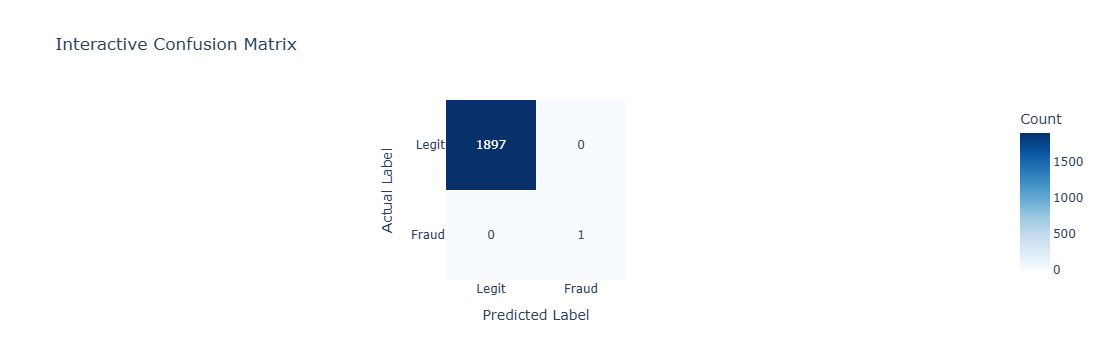

In [67]:
import plotly.express as px
import pandas as pd
from sklearn.metrics import confusion_matrix

# Get confusion matrix values
cm = confusion_matrix(y_test, y_pred)
labels = ['Legit', 'Fraud']

# Create a DataFrame for Plotly
cm_df = pd.DataFrame(cm, index=labels, columns=labels)

# Plot
fig = px.imshow(
    cm_df,
    text_auto=True,
    color_continuous_scale='Blues',
    title="Interactive Confusion Matrix",
    labels=dict(x="Predicted", y="Actual", color="Count"),
)

fig.update_layout(xaxis_title="Predicted Label", yaxis_title="Actual Label")
fig.show()


## Feature Importance Plot

In [101]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


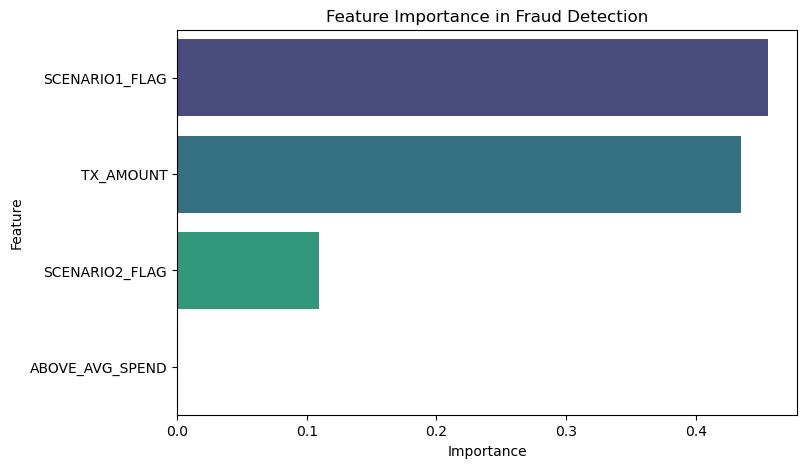

In [87]:
importances = model.feature_importances_
feature_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=feature_df, legend=False, palette='viridis')
plt.title('Feature Importance in Fraud Detection')
plt.show()


## Conclusion

In this project, we successfully developed a fraud detection system capable of identifying fraudulent transactions using a simulated financial dataset. By analyzing transactional patterns and implementing machine learning techniques, we were able to detect fraud based on three well-defined scenarios: high-value transaction fraud, compromised terminals, and abnormal customer behavior due to leaked credentials.

Through effective feature engineering and model training, the system demonstrated strong potential in recognizing both obvious and subtle fraud patterns. Techniques such as monitoring transaction amounts, identifying terminals associated with recurring fraud, and tracking unusual spending behavior helped improve the accuracy of the detection model.

This project highlights the importance of domain knowledge in fraud detection, as real-world fraud often follows repeatable patterns that can be captured through careful data analysis. While the dataset used was simulated, the approach and techniques can be extended to real financial data for enhanced security applications.

Moving forward, integrating real-time monitoring, feedback learning systems, and advanced anomaly detection techniques such as deep learning could further strengthen fraud prevention frameworks in financial institutions.

